In [1]:
import pandas as pd
import numpy as np

In [2]:
pn = pd.read_csv("penguin.csv")
pn.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
pn.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
pn.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [5]:
pn['sex'].fillna('MALE',inplace=True)

In [6]:
pn.shape

(344, 7)

In [132]:
for i in ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']:
    pn[i].fillna(pn[i].median(),inplace=True)

In [133]:
pn.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [134]:
pn["sex"] = np.where(pn["sex"]=='MALE',1,0)

In [135]:
pn.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,0
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,1
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,0


In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

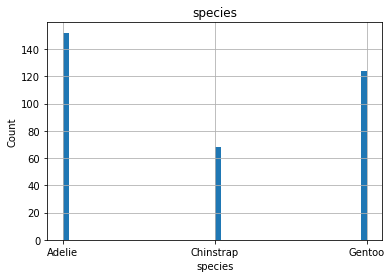

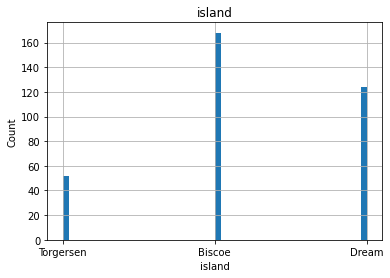

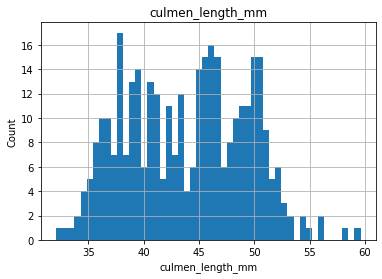

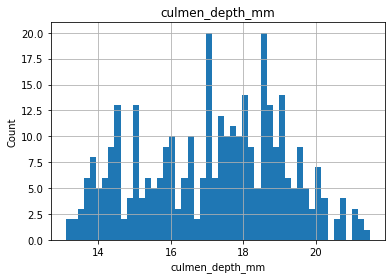

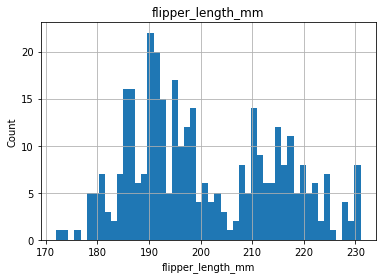

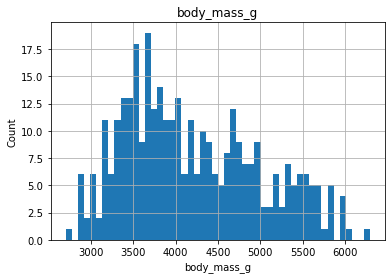

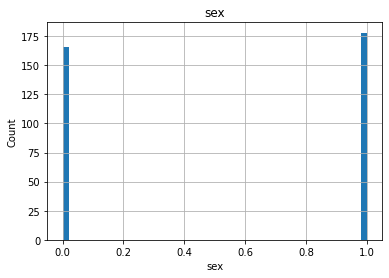

In [137]:
for feature in pn:
    data=pn.copy()
    figure=data[feature].hist(bins=50)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [138]:
for feature in pn.columns[2:]:
    pn[feature] = pn[feature]**1/2

In [139]:
pn_categorial = pn.iloc[:2]

In [140]:
pn_numerical = pn.iloc[2:]

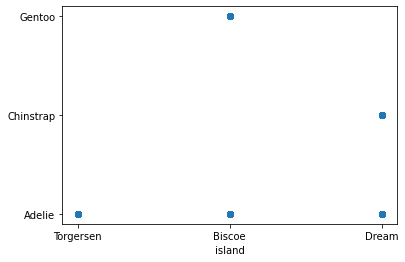

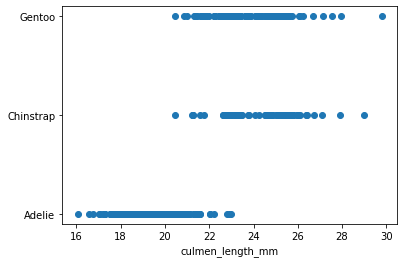

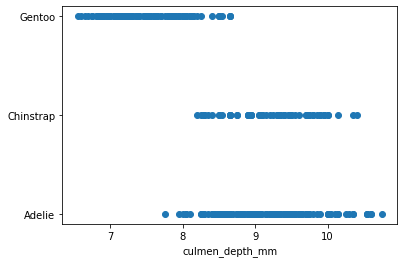

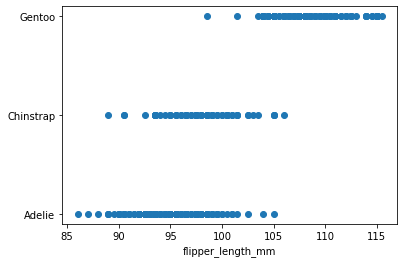

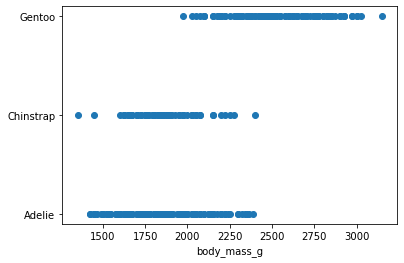

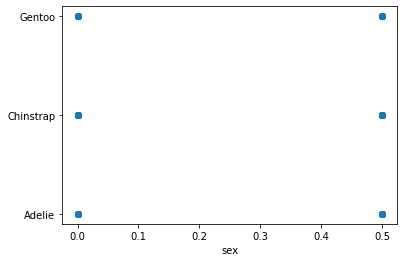

In [141]:
for feature in pn.columns[1:]:
    plt.scatter(pn[feature],pn['species'])
    plt.xlabel(feature)
    plt.show()

In [142]:
import seaborn as sns

In [143]:
#sns.pairplot(pn)

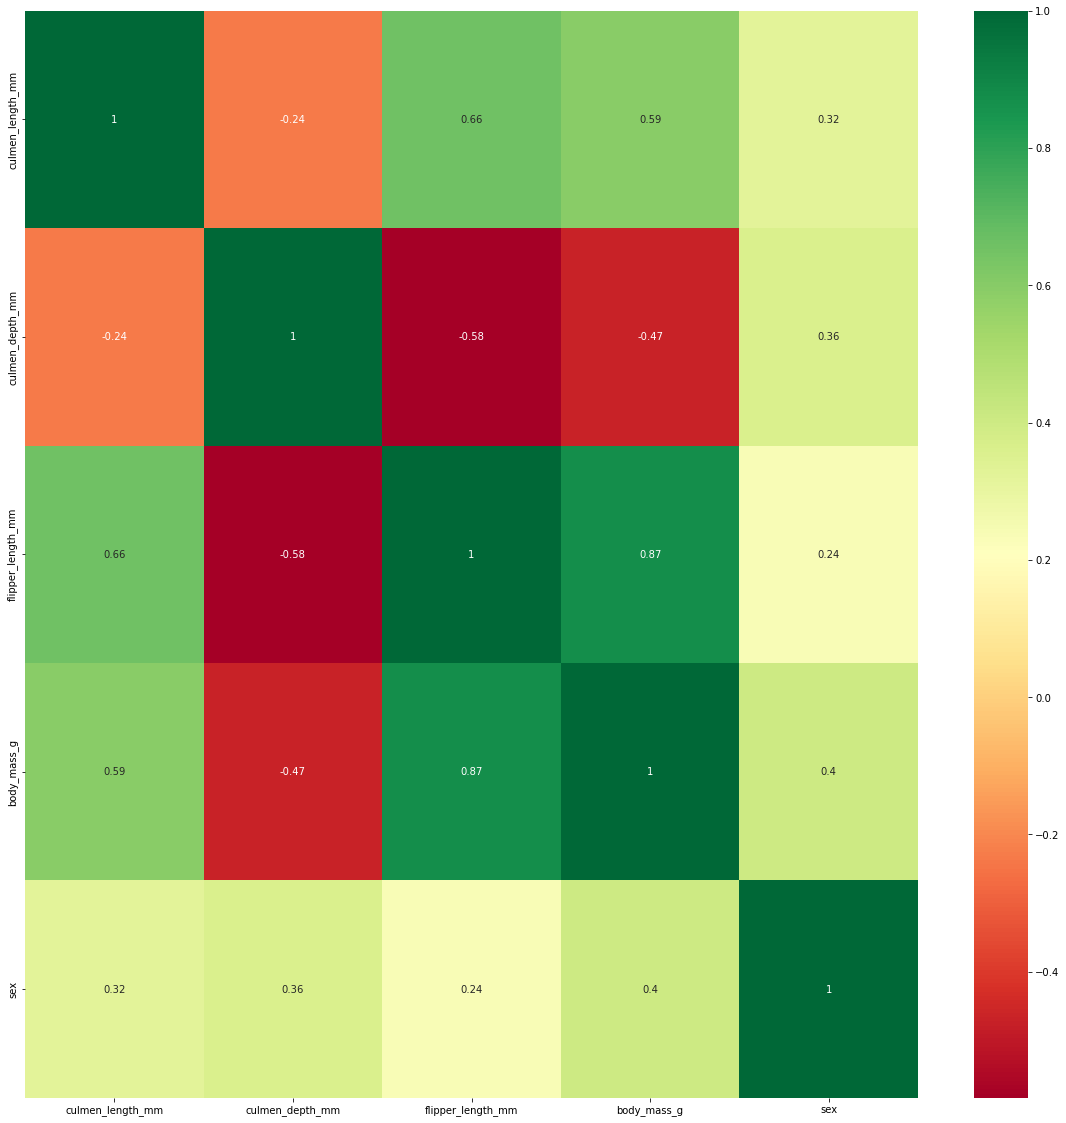

In [144]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = pn.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(pn[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [145]:
pn['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [146]:
pn['species'] = pn['species'].astype(str).str[0]

In [147]:
species_dict = {'A':0,'C':1,'G':2}
pn['species'] = pn['species'].map(species_dict)

In [148]:
pn.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,19.550,9.35,90.5,1875.0,0.5
1,0,Torgersen,19.750,8.70,93.0,1900.0,0.0
2,0,Torgersen,20.150,9.00,97.5,1625.0,0.0
3,0,Torgersen,22.225,8.65,98.5,2025.0,0.5
4,0,Torgersen,18.350,9.65,96.5,1725.0,0.0


In [149]:
for i in pn.columns[:2]:
    
    ordinal_labels = pn.groupby([i])['species'].mean().sort_values().to_dict()
    print(ordinal_labels)
    #ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
    pn[i] = pn[i].map(ordinal_labels)

{0: 0.0, 1: 1.0, 2: 2.0}
{'Torgersen': 0.0, 'Dream': 0.5483870967741935, 'Biscoe': 1.4761904761904763}


In [150]:
pn.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,0.0,19.550,9.35,90.5,1875.0,0.5
1,0.0,0.0,19.750,8.70,93.0,1900.0,0.0
2,0.0,0.0,20.150,9.00,97.5,1625.0,0.0
3,0.0,0.0,22.225,8.65,98.5,2025.0,0.5
4,0.0,0.0,18.350,9.65,96.5,1725.0,0.0


In [151]:
X = pn.iloc[:,1:]
y = pn.iloc[:,0]

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
X_test_scaled

array([[ 0.37148803,  0.28301887,  0.48809524,  0.25423729,  0.21527778,
         1.        ],
       [ 0.        ,  0.21886792,  0.55952381,  0.15254237,  0.25694444,
         0.        ],
       [ 1.        ,  0.09811321,  0.45238095,  0.22033898,  0.125     ,
         0.        ],
       [ 1.        ,  0.63773585,  0.26190476,  0.81355932,  0.79166667,
         1.        ],
       [ 1.        ,  0.05283019,  0.5952381 ,  0.25423729,  0.05555556,
         0.        ],
       [ 1.        ,  0.46792453,  0.16666667,  0.6779661 ,  0.56944444,
         0.        ],
       [ 0.        ,  0.21509434,  0.53571429,  0.3220339 ,  0.15972222,
         0.        ],
       [ 0.37148803,  0.85660377,  0.79761905,  0.59322034,  0.36111111,
         1.        ],
       [ 1.        ,  0.45283019,  0.16666667,  0.59322034,  0.65277778,
         0.        ],
       [ 1.        ,  0.07169811,  0.57142857,  0.33898305,  0.28472222,
         0.        ],
       [ 1.        ,  0.29811321,  0.82142857,  0.

In [155]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [157]:
lg = LinearRegression()
lg.fit(X_train_scaled,y_train)

LinearRegression()

In [158]:
y_pred = lg.predict(X_test_scaled)

In [159]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, y_pred),3)*100,"%")
print("loss",mean_squared_error(y_test,y_pred))


accuracy = 92.7 %
loss 0.060203327627199855


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [161]:
lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

In [162]:
y_pred = lg.predict(X_test_scaled)

In [163]:
from sklearn.metrics import r2_score,mean_squared_error
#print('accuracy =',r2_score(y_test, y_pred)*100,"%")
print("MSE:",mean_squared_error(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

MSE: 0.0
[[51  0  0]
 [ 0 16  0]
 [ 0  0 37]]
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        51
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        37

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [164]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)*100))

Accuracy_score: 100.0


In [165]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [166]:
y_pred = classifier.predict(X_test_scaled)

In [167]:
from sklearn.metrics import r2_score,mean_squared_error


In [168]:
from sklearn.metrics import accuracy_score,roc_auc_score
#print('accuracy =',r2_score(y_test, y_pred)*100,"%")
print("MSE:",mean_squared_error(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

MSE: 0.009615384615384616
[[50  1  0]
 [ 0 16  0]
 [ 0  0 37]]
0.9903846153846154
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        51
         1.0       0.94      1.00      0.97        16
         2.0       1.00      1.00      1.00        37

    accuracy                           0.99       104
   macro avg       0.98      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

